In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
Categorical_Col = []                                                                 
Numerical_Col = []

In [4]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)
       
    else:
        Numerical_Col.append(col)

In [5]:
Categorical_Col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [6]:
Numerical_Col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for col in Categorical_Col:
    df[col] = LE.fit_transform(df[col])

In [12]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
GR = GradientBoostingClassifier()
GR.fit(X_train, np.ravel(y_train))
y_hat = GR.predict(X_test)


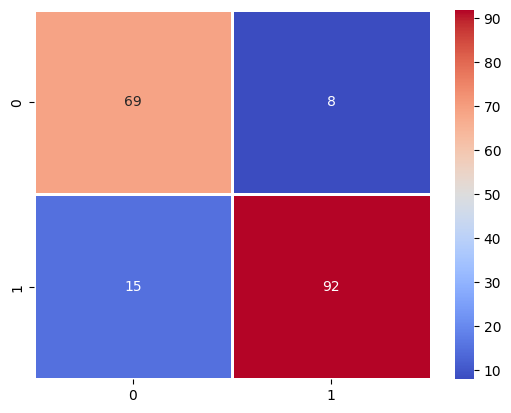

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test , y_hat), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [31]:
from sklearn import tree
Ab=tree.DecisionTreeClassifier()
Ab.fit(X_train,np.ravel(y_train))
y_pred = Ab.predict(X_test)


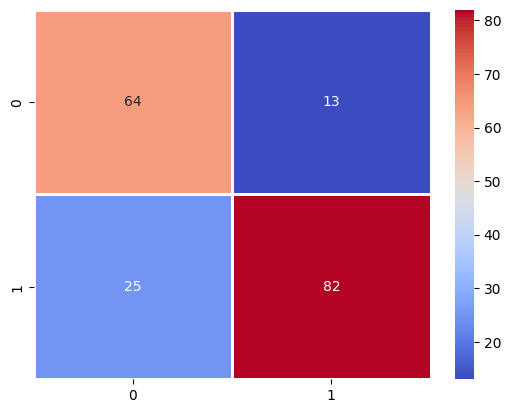

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_new=rf.predict(X_test)

C:\Users\SOWMITH DURUSOJU\AppData\Local\Temp\ipykernel_15008\4225334850.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


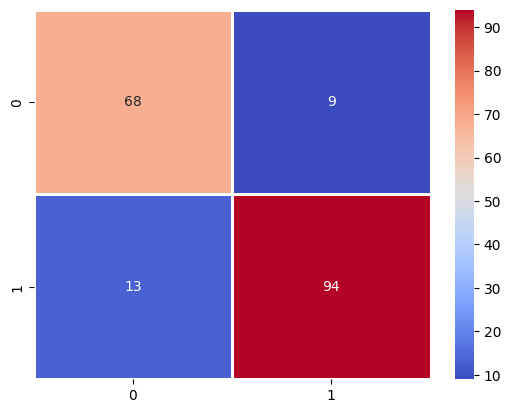

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test , y_new), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_new))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, y_hat)
rf_auc = roc_auc_score(y_test,y_pred)
nb_auc = roc_auc_score(y_test,y_new)



In [52]:
print(' Gradientboost= %.3f' % (r_auc))
print('Decision tree = %.3f' % (rf_auc))
print('Randomforest= %.3f' % (nb_auc))

 Gradientboost= 0.878
Decision tree = 0.799
Randomforest= 0.881


In [53]:
r_fpr, r_tpr, _ = roc_curve(y_test, y_hat)
rf_fpr, rf_tpr, _ = roc_curve(y_test,y_pred)
nb_fpr, nb_tpr, _ = roc_curve(y_test,y_new)

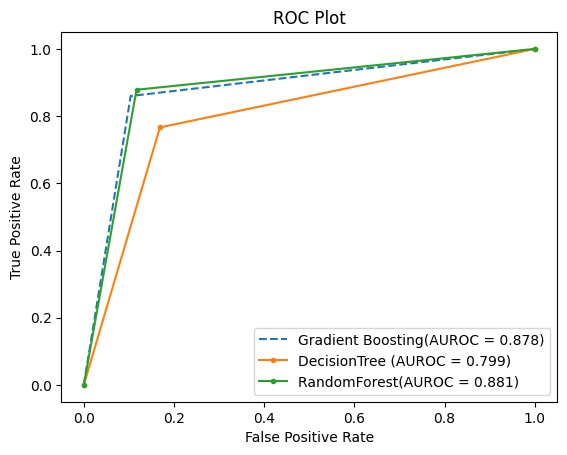

In [54]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Gradient Boosting(AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='DecisionTree (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='RandomForest(AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
#Both the Random Forest and Gradient boosting are good but because of more area under roc we choose random forest